# Athlete Medal Winner Regression Model

### Things to investigate in this notebook:
- Is there a trend in an athlete's body type that indicates whether they will win a medal?
- Is the average competitive life of an athlete going up or down in certain sports? What might be expected going forard?

### Import packages and clean the dataset.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import athletes
path_to_csv = os.path.join("..", "data", "athlete_events.csv")
athletes = pd.read_csv(path_to_csv)

# import regions
path_to_regions_csv = os.path.join("..", "data", "noc_regions.csv")
regions = pd.read_csv(path_to_regions_csv)

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
regions.drop(columns=["notes"], inplace=True)
regions.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [6]:
athletes = pd.merge(athletes, regions, on="NOC", how="left")
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [7]:
# Replace NANs for medals with "none"
athletes["Medal"].replace(np.NaN, "None", inplace=True)
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands


In [8]:
# Drop all rows containing NaN
athletes.dropna(how="any", inplace=True)
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None,Netherlands
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands


## Focus on Medal Winners for specific sports:

### Keep the following Columns: 
- Sex
- Age
- Height
- Weight
- Year
- Season
- Sport (Not Considered in Algorithm)
- Event (Not Considered in Algorithm)
- Medal (Group medal winners together)

In [9]:
winning_athletes = athletes.copy()

def medal_winner(row):
    if row["Medal"] != "None":
        val = "Y"
    else:
        val = "N"
    return val

winning_athletes["medal(Y/N)"] = winning_athletes.apply(medal_winner, axis=1)

winning_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,medal(Y/N)
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China,N
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China,N
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands,N
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None,Netherlands,N
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands,N


In [10]:
# Drop unnecessary columns to prepare for ML model:
winning_athletes.drop(columns=["ID", "Name", "Team", "NOC", "Games", "City", "Medal", "region"], inplace=True)

## Machine Learning Model Time:

#### Make y medal(Y/N)

In [11]:
# Input sport and Event:

event = "Athletics Women's High Jump"

winning_athletes_event = winning_athletes.loc[winning_athletes["Event"] == event]


X = winning_athletes_event.drop(columns="medal(Y/N)")
y = winning_athletes_event["medal(Y/N)"]

X.describe()

,Age,Height,Weight,Year
count,526.000000,526.000000,526.000000,526.000000
mean,23.614068,177.188213,61.465779,1984.296578
std,4.459907,6.509241,5.735252,22.047643
min,15.000000,155.000000,45.000000,1928.000000
25%,20.000000,173.000000,58.000000,1968.000000
50%,23.000000,178.000000,61.000000,1988.000000
75%,26.750000,181.000000,65.000000,2004.000000
max,38.000000,193.000000,82.000000,2016.000000


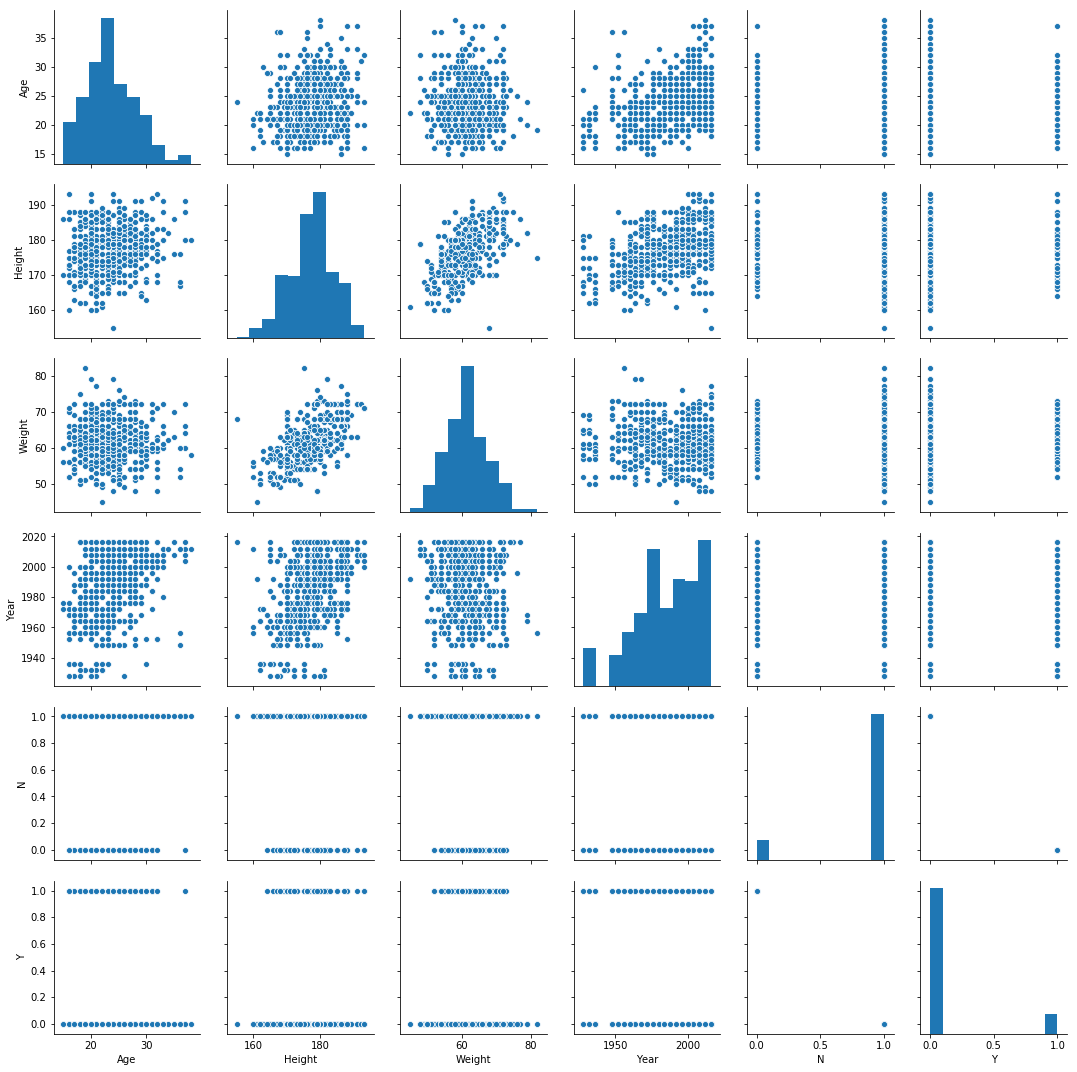

In [12]:
n = pd.get_dummies(winning_athletes_event["medal(Y/N)"])
winning_athletes_event = pd.concat([winning_athletes_event,n], axis=1)
winning_athletes_event.drop(["medal(Y/N)"], inplace=True, axis=1)

pairplot = sns.pairplot(winning_athletes_event)
pairplot.savefig("output.png")

In [47]:
# Create dummies
n = pd.get_dummies(X.Sex)
X = pd.concat([X,n], axis=1)
X.drop(["Sex", "Season", "Sport", "Event"], inplace=True, axis=1)
X.head()

,Age,Height,Weight,Year,M
45,28.0,175.0,64.0,1948,1
53,32.0,175.0,64.0,1952,1
141,23.0,167.0,64.0,2016,1
439,22.0,167.0,63.0,2000,1
791,19.0,161.0,62.0,2012,1


In [48]:
# Create training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [49]:
# Start Logistical Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
classifier.fit(X_train, y_train)

C:\Users\mtoriello0725\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9642166344294004
Testing Data Score: 0.9623188405797102


In [52]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
First 10 Actual labels: ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


In [53]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,N,N
1,N,N
2,N,N
3,N,N
4,N,N
5,N,N
6,N,N
7,N,N
8,N,N
9,N,N


# Do not see how this model can be useful... Bust